In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data analysis

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

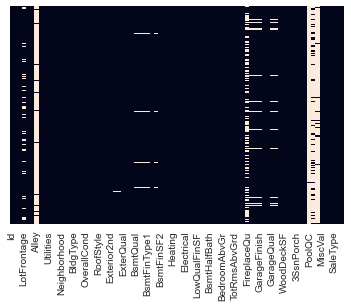

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocessing

In [8]:
# Preenchendo os valores vázios/nan com a média
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
# retirando a coluna Alley por ter vários missing values
df.drop(['Alley'], axis=1, inplace=True)

In [10]:
# Preenchendo os valores vázios com o mode
# o que mode faz?
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
# Preenchendo os valores vázios com o mode
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'], axis=1, inplace=True)

In [13]:
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1, inplace=True)

In [15]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [16]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [17]:
df.shape

(1460, 75)

In [18]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

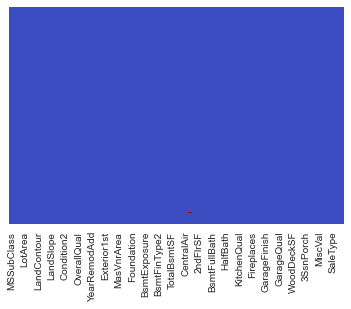

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='coolwarm')

In [20]:
# deletando os data points em que em suas features estão zerados, eu acho
df.dropna(inplace=True)

In [21]:
df.shape

(1459, 75)

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [23]:
# sHandle Categorical features

columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood', 'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond', 'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'RoofStyle','RoofMatl','Exterior1st',
         'Exterior2nd','MasVnrType','Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual','Functional',  'FireplaceQu','GarageType','GarageFinish','GarageQual',
         'GarageCond','PavedDrive']

In [24]:
df.ExterCond.value_counts()

TA    1281
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

In [25]:
len(columns)

39

### Feature engineering

In [26]:
# transforms categorical and continuous features
def category_one_hot_multcolumns(multcolumns):
    df_final = final_df
    i = 0

    for fields in multcolumns:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        final_df.drop([fields], axis=1, inplace=True)

        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)

        i=i+1

    df_final = pd.concat([final_df, df_final], axis=1)
    return df_final

In [27]:
# fazendo a cópia do data frame com o preprocessamento, pois df será alterado várias vezes após este ponto
main_df = df.copy()

### Combine Test.csv with Train.csv

In [28]:
test_df = pd.read_csv('formulated_test.csv')

In [29]:
test_df.shape

(1459, 74)

In [30]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [31]:
# concat test and train
final_df = pd.concat([df, test_df], axis=0)

In [32]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2918, dtype: float64

In [33]:
main_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1459, dtype: int64

#### Preprocessing after concat

In [34]:
final_df.shape

(2918, 75)

### Applying feature engineering

In [35]:
final_df = category_one_hot_multcolumns(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [36]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [37]:
final_df.shape

(2918, 236)

In [38]:
# remove duplicated columns
final_df = final_df.loc[:, ~final_df.columns.duplicated()]

In [39]:
final_df.shape

(2918, 176)

In [40]:
# split the datas
df_Train = final_df.iloc[:1459, :]
df_Test = final_df.iloc[:1459, :]

In [41]:
# remove SalePrice of test data
df_Test.drop(['SalePrice'], axis=1, inplace=True)

C:\Users\thier\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [43]:
df_Test.shape

(1459, 175)

In [44]:
X_train = df_Train.drop(['SalePrice'], axis=1)
y_train = df_Train['SalePrice']

# Training the algorithm with XGBRegressor

In [45]:
# Como funciona o algoritmo de Xgboost?
import xgboost

classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [46]:
import pickle

filename = 'finalized model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [47]:
y_pred = classifier.predict(df_Test)

In [48]:
y_pred

array([206687.08, 182717.2 , 221730.48, ..., 266362.12, 139735.06,
       147591.39], dtype=float32)

In [49]:
# create a sample submission file and submit

pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)

### Getting score of XGBRegressor

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_Train.drop(['SalePrice'], axis=1), df_Train['SalePrice'], random_state=0)

In [51]:
import xgboost

classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [52]:
classifier.score(X_test, y_test)

0.8510479194798815

# Using Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
random_forest.score(X_test, y_test)

0.8740506609258742

In [55]:
X_test.shape

(365, 175)

### Getting a better accuracy of Rando Forest

In [56]:
## function to get the highest value

def highest_param(score_array, new_score, max_feature, best_param):
    if len(score_array) == 0:
        return best_param

    highest = 0
    for index in range(len(score_array) - 1):
        if score_array[index] < new_score:
            highest =  max_feature
        else:
            highest = best_param

    return highest

Text(0, 0.5, 'Testing Accuracy')

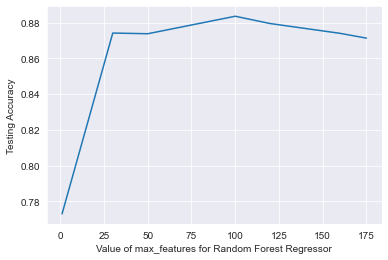

In [57]:
max_features = [1, 30, 50, 100, 120, 160, X_train.shape[1]]
scores = []
best_max_features = 0

for max_feature in max_features:
    random_forest = RandomForestRegressor(max_features=max_feature)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_test, y_test)
    scores.append(score)
    best_max_features = highest_param(scores, score, max_feature, best_max_features)

plt.plot(max_features, scores)
plt.xlabel('Value of max_features for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

In [58]:
best_max_features

100

Text(0, 0.5, 'Testing Accuracy')

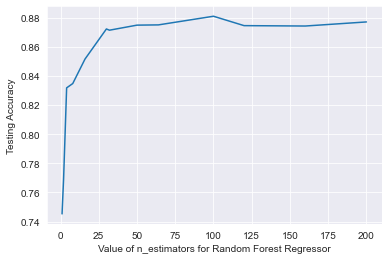

In [59]:
n_estimators = [1, 2, 4, 8, 16, 30, 32, 50, 64, 100, 120, 160, 200]
scores = []
best_n_estimator = 0

for n_estimator in n_estimators:
    random_forest = RandomForestRegressor(max_features=100, n_estimators=n_estimator)
    random_forest.fit(X_train, y_train)
    score = random_forest.score(X_test, y_test)
    scores.append(score)
    best_n_estimator = highest_param(scores, score, n_estimator, best_n_estimator)

plt.plot(n_estimators, scores)
plt.xlabel('Value of n_estimators for Random Forest Regressor')
plt.ylabel('Testing Accuracy')

In [60]:
best_n_estimator

200

## Getting score with the best parameters

In [61]:
random_forest = RandomForestRegressor(n_estimators=best_n_estimator, max_features=best_max_features)
random_forest.fit(X_train, y_train)
score_random_forest = random_forest.score(X_test, y_test)
score_random_forest

0.8780449875279137

In [62]:
result = random_forest.predict(df_Test)

In [63]:
result

array([207682.25 , 171454.12 , 212406.46 , ..., 250459.395, 139050.5  ,
       147952.51 ])

### Importing result to csv

In [64]:
# create a sample submission file and submit

pred = pd.DataFrame(result)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission.csv', index=False)